In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [188]:
file_path = r"~/poincare/cancer_regression/data/cancer_reg.csv"
cancer_df = pd.read_csv(file_path)

In [189]:
train_set, test_set = train_test_split(cancer_df, test_size = 0.2) # now have a training set and a testing set! Yay!

In [190]:
cancer_df_train_set = train_set.drop("TARGET_deathRate", axis=1)[["povertyPercent", "medIncome","PctPublicCoverage"]].copy()
cancer_labels = train_set["TARGET_deathRate"].copy()

In [ ]:
# There's a lot here.
# We can predict a lot of these features using a lot of these features.
# It's clear here that the TARGET_deathRate is positively correlated with both povertyPercent and PctPublicCoverage
# Moreover, TARGET_deathRate is negatively correlated with medIncome

<Axes: xlabel='povertyPercent', ylabel='TARGET_deathRate'>

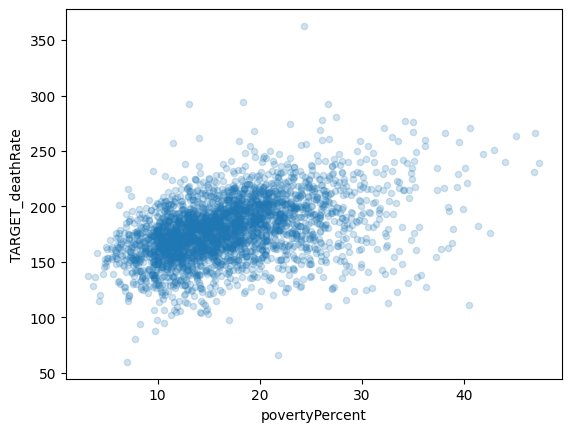

In [191]:
cancer_df.plot(kind="scatter", x="povertyPercent", y="TARGET_deathRate", alpha=0.2)

<Axes: xlabel='medIncome', ylabel='TARGET_deathRate'>

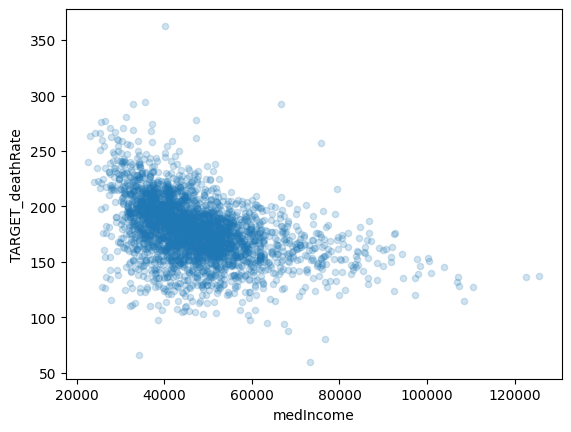

In [192]:
cancer_df.plot(kind="scatter", x="medIncome", y="TARGET_deathRate", alpha=0.2)

In [ ]:
# Upon first glance it doesn't seem like there are any worthwhile new data points we could make from existing ones.
# We could possibly scale down median age, but I doubt that age generally plays a significant role in cancer mortality rate.

In [ ]:
# Now we do data cleaning
# I'd like to operate only on povertyPercent, PctPublicCoverage, medIncome to predict TARGET_deathRate

In [193]:
# How to grab names of all columns
cancer_df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='str')

In [196]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

# To use SimpleImputer, we must eliminate the non-numerical values.
# Check column types

cancer_numerical = cancer_df_train_set
# cancer_numerical = cancer_df[["medIncome", "povertyPercent", "PctPublicCoverage"]]

cancer_numerical.head()

cancer_numerical.isnull().sum() #PctPrivateCoverageAlone, PctEmployed16_Over, PctSomeCol18_24

# Transform missing values into np.nan

imputer.fit_transform(cancer_numerical)

array([[1.8200e+01, 4.3348e+04, 3.7600e+01],
       [1.1700e+01, 4.3859e+04, 3.8500e+01],
       [2.0100e+01, 4.0124e+04, 3.6700e+01],
       ...,
       [1.3100e+01, 6.6671e+04, 2.6600e+01],
       [1.3500e+01, 4.2310e+04, 3.5100e+01],
       [1.4100e+01, 5.6444e+04, 3.1400e+01]], shape=(2437, 3))

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])
full_pipeline = Pipeline([('num', numeric_pipeline)])
cancer_prepped = full_pipeline.fit_transform(cancer_numerical)

In [203]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(cancer_prepped, cancer_labels) # <- This line something went wrong

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [204]:
some_data = cancer_numerical.iloc[:5]
some_labels = cancer_labels_truncated.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
print(f'Predictions: {lin_reg.predict(some_data_prepared)}')

# amazing improvement

Predictions: [188.96091845 181.13495307 191.56041451 175.29974177 155.59464926]


In [205]:
print(f'Labels: {list(some_labels)}')

Labels: [189.0, 214.4, 189.6, 209.9, 192.2]


In [201]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(cancer_prepped)
lin_mse = mean_squared_error(cancer_labels_truncated, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(24.422222148246977)

In [ ]:
# Model is working now! We must now fine tune, visualize, and interpret the model.